In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from matplotlib.colors import ListedColormap

%matplotlib inline

In [19]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/banknote-authentication-uci/BankNoteAuthentication.csv


In [20]:
banknotes= pd.read_csv('/kaggle/input/banknote-authentication-uci/BankNoteAuthentication.csv' )

banknotes.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


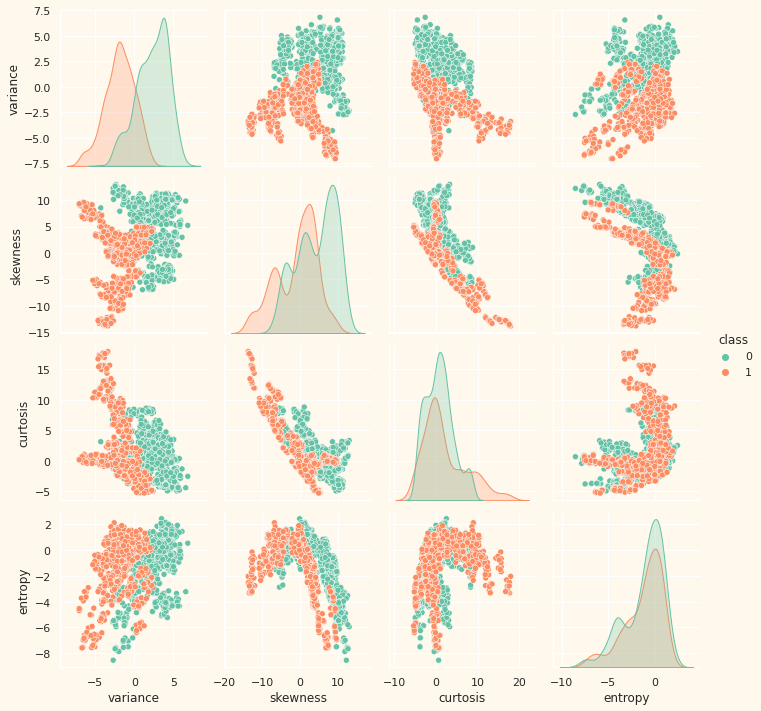

In [21]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
cmap = colors.ListedColormap(sns.color_palette("Set2").as_hex())

sns.pairplot(banknotes, hue='class', palette = ("Set2")) 

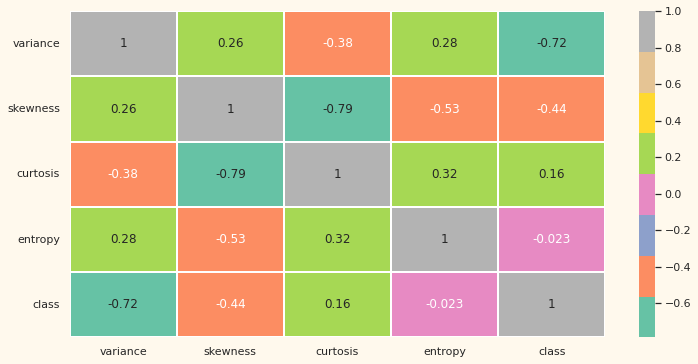

In [22]:
sns.heatmap(banknotes.corr(),annot=True,cmap = cmap,linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Text(0.5, 8.95999999999998, 'Variance')

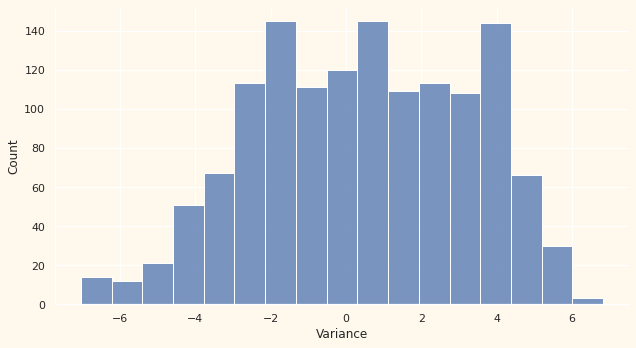

In [23]:
sns.displot(banknotes["variance"], height = 5, aspect = 1.8)
plt.xlabel("Variance")

Text(0.5, 8.95999999999998, 'Skewness')

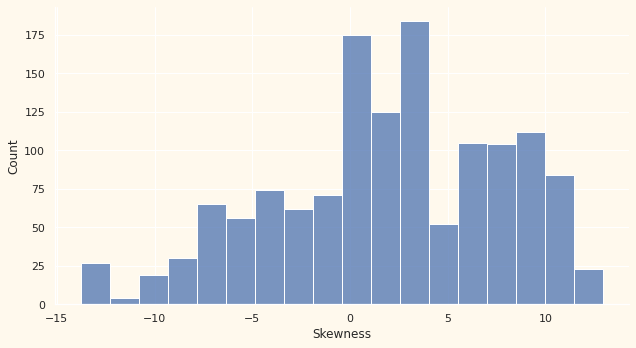

In [24]:
sns.displot(banknotes["skewness"], height = 5, aspect = 1.8)
plt.xlabel("Skewness")

Text(0.5, 8.95999999999998, 'Curtosis')

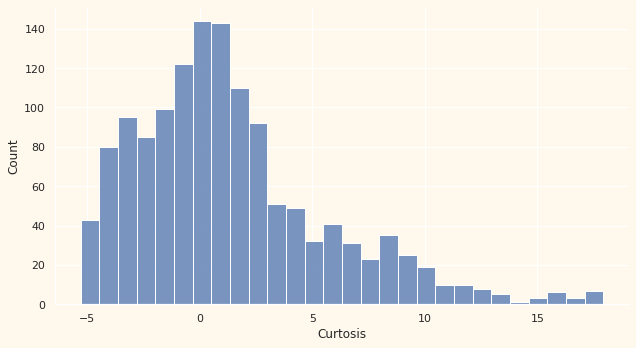

In [25]:
sns.displot(banknotes["curtosis"], height = 5, aspect = 1.8)
plt.xlabel("Curtosis")

Text(0.5, 8.95999999999998, 'Entropy')

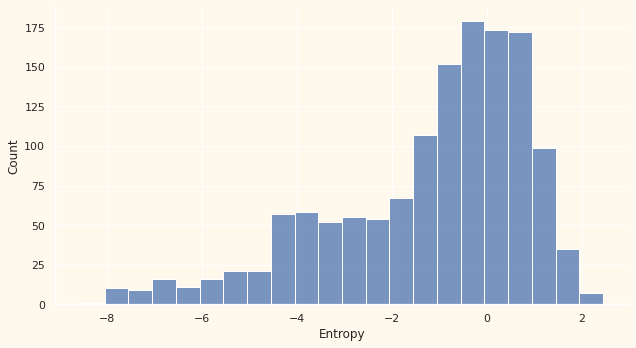

In [26]:
sns.displot(banknotes["entropy"], height = 5, aspect = 1.8)
plt.xlabel("Entropy")

Text(0.5, 0, 'Class')

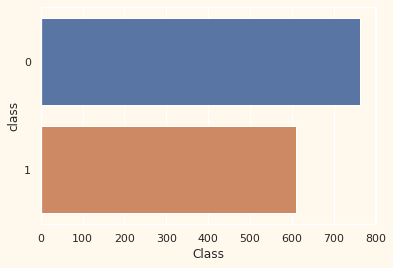

In [27]:
sns.countplot(data = banknotes, y = "class")
plt.xlabel("Class")

In [36]:
s = (banknotes.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [37]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [41]:
from sklearn.preprocessing import StandardScaler
ds = banknotes.copy()

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1372.0,-8.286213e-17,1.566243,-3.046012,-1.168342,-0.053956,0.839465,4.440482
col2,1372.0,0.000000e+00,1.266014,-2.352283,-0.967042,-0.006124,0.729984,4.041113
col3,1372.0,-2.071553e-17,0.813050,-1.773817,-0.583713,-0.039556,0.481195,2.403134


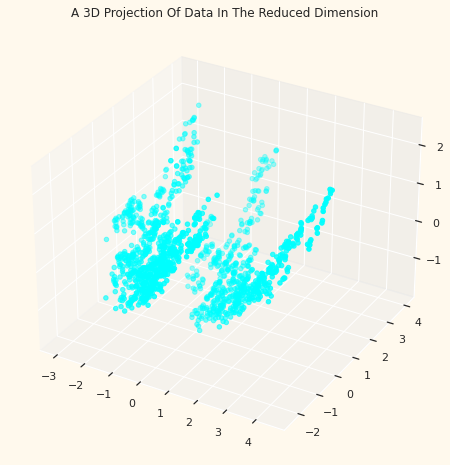

In [45]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c = "cyan", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


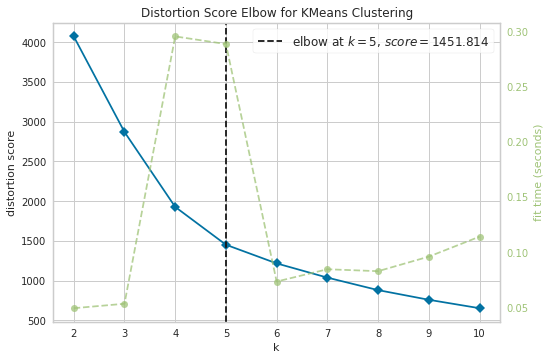

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

banknotes["Clusters"]= yhat_AC

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.add(Dense(1, input_shape=(3,), activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [29]:
X = banknotes[['variance','skewness', 'curtosis','entropy']]
y = banknotes[["class"]]

In [32]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.35,  random_state = 7)

model.fit(train_X, train_y, epochs=30)

accuracy = model.evaluate(test_X, test_y)[1]

print('Accuracy:',accuracy)

Epoch 1/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.7497
Epoch 2/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7767
Epoch 3/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7912
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.8070
Epoch 5/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.8260
Epoch 6/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.8418
Epoch 7/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.8519
Epoch 8/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.8687
Epoch 9/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8721
Epoch 10/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.8743
Epoch 11/30
28/28 [

In [33]:
monitor_val_acc = EarlyStopping(monitor='accuracy', mode="max",
                                patience=6)

model.fit(train_X, train_y, 
          epochs=100, validation_data=(test_X, test_y),
          callbacks=[monitor_val_acc])

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4062 - accuracy: 0.9506 - val_loss: 0.4106 - val_accuracy: 0.9501
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.9529 - val_loss: 0.4050 - val_accuracy: 0.9501
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.9562 - val_loss: 0.3999 - val_accuracy: 0.9501
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.9596 - val_loss: 0.3950 - val_accuracy: 0.9522
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.9607 - val_loss: 0.3904 - val_accuracy: 0.9522
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.9607 - val_loss: 0.3861 - val_accuracy: 0.9522
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.9607 - val_loss: 0.3819 - val_accuracy: 0.9522
Epoch 8/100
2

In [34]:
print(model.evaluate(test_X, test_y)[1])

16/16 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.9563
0.9563409686088562
